# Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

### Descenso de gradiente

Es el enfoque tradicional donde se calcula el gradiente de la función de pérdida respecto a todos los features de la data de entrenamiento. Actualiza los pesos del modelo después de procesor todos los features de entrenamiento.
#### Ventajas:
- Garantiza la convergencia al mínimo local o global.
- Utiliza de manera eficiente el hardware al aprovechar operaciones vectorizadas.
#### Desventajas:
- Requiere almacenar todos los datos de entrenamiento en memoria, lo que es un problema para conjuntos muy grandes.
- Debido a que debe almacenar y analizar todos los datos su coste computacional aumenta.

### Descenso de Gradiente por Mini Lotes

Es una variante intermedia en donde la gradiente y los pesos se calculan utilizando un subconjunto pequeño (mini - bache) y fijo de los ejemplos de entrenamiento.
Estos "mini-lotes" se eligen aleatoriamente en cada iteración del entrenamiento.
#### Ventajas:
- Utiliza menos memoria en comparación con la variante anterior, debido al menor uso de features.
- Aprovecha la eficiencia de las operaciones vectorizadas y paralelismo en hardware moderno.
- Mejora la convergencia en problemas no convexos al introducir variabilidad en el cálculo de del gradiente.

#### Desventajas:
- Debido a la variabilidad de los features durante el entrenamiento puede llegar a requerir el ajuste de la tasa de aprendizaje.
- No garantiza convergencia al mínimo global en problemas no convexos.

#### Referencia
- https://medium.com/metadatos/todo-lo-que-necesitas-saber-sobre-el-descenso-del-gradiente-aplicado-a-redes-neuronales-19bdbb706a78

### Descenso de Gradiente Estocástico

El gradiente y los pesos son calculados y actualizados utilizando solo un ejemplo de entrenamiento a la vez, el cual es elegido aleatoriamente en cada iteración.

#### Ventajas
- Debido a que solo utiliza un solo ejemplo por cada iteración utiliza mucha menos memoria que las variantes anteriores, lo que permite entrenar modelos de conjuntos muy grandes.
- Su alta variabilidad en las actualizaciones ayuda a evitar mínimos locales en problemas no convexos.
- Converge más rápido inicialmente debido a las actualizaciones de pesos más frecuentes.

#### Desventajas
- Su alta variabilidad hace que el proceso de aprendizaje sea menos estable y requiere ajustar la tasa de aprendizaje de forma cuidadosa.
- No garantiza convergencia en problemas no convexos y puede oscilar alrededor del mínimo global.
- Menor aprovechamiento del parelelismo.

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada

### Extración de caracteristicas

Consiste en transformar los datos originales en un conjunto de caracteristicas nuevas y más representativas. Se utilizan algoritmos como el análisis de componentes principales (PCA) o la descompisición de valor singular (SVD) para crear nuevas caracteristicas que conserven la información relevante del conjunto de datos original. 

#### Escenarios de uso 

- Cuando se tiene un conjunto de datos con muchas características redundantes.
- Para reducir la dimensionalidad y mejorar la eficiencia computacional.
- Cuando se busca representar los datos de manera más compacta.

### Selección de caracteristicas

Consiste elegir un subconjunto de las caracteristicas originales, eliminando las menos relevantes o redundantes. Se pueden utlizar tecnicas como regularización o pruebas estadísticas como prueba de t de Student. 

#### Escenarios

- Cuando se quiere mejorar la interpretabilidad del modelo eliminando características irrelevantes.
- Para reducir el riesgo de sobreajuste en modelos complejos.
- En situaciones donde hay muchas características pero solo unas pocas son realmente informativas.

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros

# Ejercicios Prácticos

## Task 2.1 - Gradiente descendiente estócastico

In [1]:

# 2*x**3-3*x**2+5*x+3

coeficients = [2, -3, 5, 3]

c:\Python311\Lib\site-packages\numpy\lib\polynomial.py:780: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
C:\Users\caste\AppData\Local\Temp\ipykernel_9600\3502994653.py:29: RuntimeWarning: invalid value encountered in subtract
  coefficients -= learning_rate * error * gradient  # Aquí estaba el error


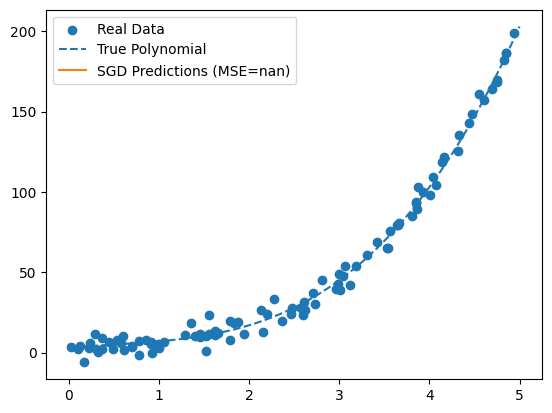

SGD Time: 0.0803 seconds, MSE: nan


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definir la función polinómica
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

# Generar datos de entrada
np.random.seed(42)
x_data = np.sort(5 * np.random.rand(100))
y_data = polynomial(x_data) + np.random.normal(scale=5, size=len(x_data))

# Definir la función para calcular el error cuadrático medio (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Descenso de gradiente estocástico (SGD)
def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=100):
    start_time = time.time()
    coefficients = [2, -3, 5, 3]  # Coeficientes para el polinomio de grado 3
    for epoch in range(epochs):
        for i in range(len(x)):
            xi = x[i]
            yi = y[i]
            prediction = np.polyval(coefficients, xi)
            error = prediction - yi
            gradient = xi**3  # Derivada del polinomio respecto a xi
            coefficients -= learning_rate * error * gradient  # Aquí estaba el error
    elapsed_time = time.time() - start_time
    return coefficients, elapsed_time

sgd_coefficients, sgd_time = stochastic_gradient_descent(x_data, y_data)
y_sgd_pred = np.polyval(sgd_coefficients, x_data)
mse_sgd = mean_squared_error(y_data, y_sgd_pred)


# Graficar la función real y las predicciones
plt.scatter(x_data, y_data, label='Real Data')
x_range = np.linspace(0, 5, 100)
plt.plot(x_range, polynomial(x_range), label='True Polynomial', linestyle='--')
plt.plot(x_range, np.polyval(sgd_coefficients, x_range), label=f'SGD Predictions (MSE={mse_sgd:.2f})')
plt.legend()
plt.show()

print(f"SGD Time: {sgd_time:.4f} seconds, MSE: {mse_sgd:.4f}")

## Task 2.2 - Feature Selection

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
datos = pd.read_csv('lol.csv')
datos.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [5]:
X = datos.iloc[:, 2:-1]
y = datos.iloc[:, 1]
print(X)
print(y)

      blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0                  28                   2               1          9   
1                  12                   1               0          5   
2                  15                   0               0          7   
3                  43                   1               0          4   
4                  75                   4               0          6   
...               ...                 ...             ...        ...   
9874               17                   2               1          7   
9875               54                   0               0          6   
9876               23                   1               0          6   
9877               14                   4               1          2   
9878               18                   0               1          6   

      blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0              6           11                  0         

### Selección de Características Univariate

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
X_new = SelectKBest(f_classif, k = 2).fit_transform(X, y)
print(X_new)

[[  643.  -643.]
 [-2908.  2908.]
 [-1172.  1172.]
 ...
 [-2416.  2416.]
 [ -839.   839.]
 [  927.  -927.]]


In [7]:
#Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_new, y, test_size = 0.2, random_state = 1)

In [8]:
# Entrene el modelo de SVM con el conjunto de entrenamiento
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

In [ ]:
# Predicción y métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.8
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.62      0.73        13
           2       0.50      0.83      0.62         6

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.78        30
weighted avg       0.85      0.80      0.81        30



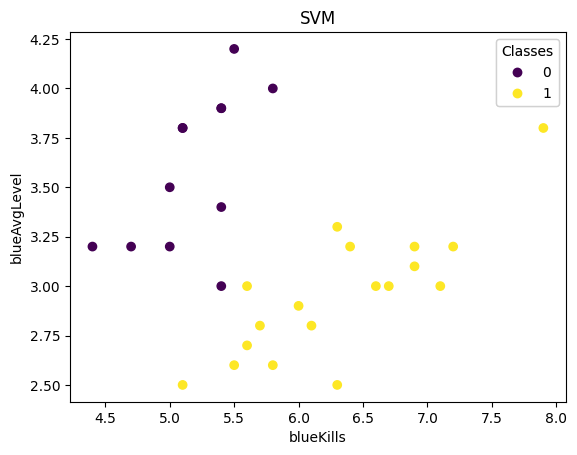

In [ ]:
# Previsualización de los resultados del conjunto de prueba
fig, ax = plt.subplots() 
scatter = ax.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

ax.add_artist(legend1)

ax.set_title('SVM')
ax.set_xlabel('blueKills')
ax.set_ylabel('blueAvgLevel')

plt.show()

ValueError: cannot reshape array of size 7500 into shape (50,50)

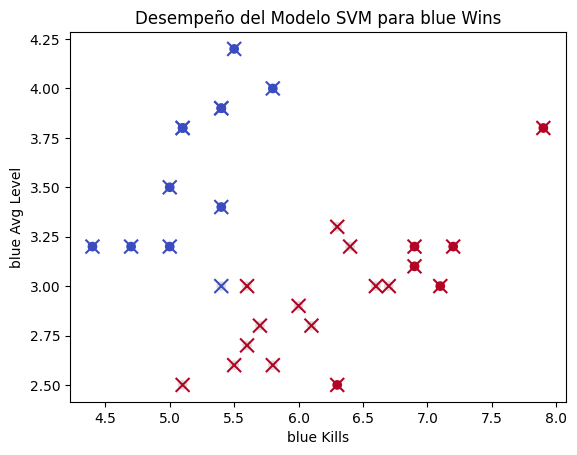

In [ ]:
# Scatter plot
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_prueba, cmap='coolwarm', marker='o', label='Real')
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100, label='Predicción')

# Añadir etiquetas y leyenda
plt.xlabel('blue Kills')
plt.ylabel('blue Avg Level')
plt.title('Desempeño del Modelo SVM para blue Wins')

# Crear la línea de límite (boundary)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear puntos para trazar la línea de límite
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Obtener decision_function para cada punto en la malla
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar la línea de límite
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Mostrar la gráfica
plt.legend(loc='lower right')
plt.show()

## Task 2.3 - Perceptrón

In [ ]:
# implementación de perceptrón de una capa

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
%matplotlib inline


In [ ]:
# Cargar el conjunto de datos
iris = load_iris()

X = iris.data[:, :2]  # (sepal length y sepal width)
y = (iris.target)  # 1 si es setosa, 0 si no
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
clf = Perceptron(eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Calcular la precisión del clasificador
print("classification_report: \n", classification_report(y_test, y_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.67      0.92      0.77        13
           2       0.00      0.00      0.00         6

    accuracy                           0.77        30
   macro avg       0.53      0.64      0.58        30
weighted avg       0.62      0.77      0.69        30



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


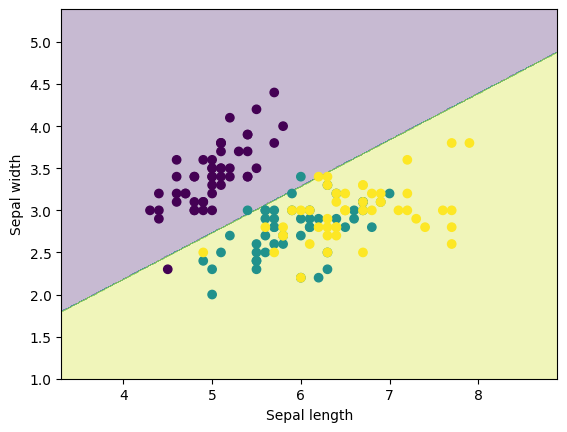

In [ ]:
# Graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)



ax.add_artist(legend1)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()